**Math 345M Homework 8**

**Author: Cole Pendergraft**

**Chapter 10 problems 106, 108**

**Chapter 11 problems 86, 90**

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

**Problem 10.106:** Researchers conducted a study to find out if there is a difference in the use of eReaders by different age groups. Randomly selected participants were divided into two age groups. In the 16- to 29-year-old group, 7% of the 628 surveyed use eReaders, while 11% of the 2,309 participants 30 years old and older use eReaders. **Use Appendix E.**

We have been given two samples as well as two sample proportions.

$n_{16-29}$ = Sample size of 16 - 29 year olds = 628

$p_{16-29}$ = Sample proportion of 16 - 29 year olds who have eReaders = 7%

$\bar x_{16-29}$ = The sample mean of 16 - 29 year olds who have eReaders = $0.07*628$ = 44

$n_{30+}$ = Sample size of 30+ year olds = 2309

$p_{30+}$ = Sample proportion of 30+ year olds who have eReaders = 11%

$\bar x_{30+}$ = The sample mean of 30+ year olds who have eReaders = $0.11*2309$ = 254

In [2]:
n_1629 = 628
x_1629 = 44
p_1629 = 0.07
n_30 = 2309
x_30 = 254
p_30 = 0.11

**a)** State $H_0$.

We have two unknown population proportions, $P_{16-29}$ and $P_{30+}$. The null hypothesis is a statement of no difference, so we have:

$H_0: P_{16-29} = P_{30+}$

**b)** State $H_a$. 

Our alternative hypothesis will be directly opposite our null hypothesis:

$H_a = P_{16-19} \ne P_{30+}$

**c)** State what your random variable represents.

Our random variable $P_{16-29} - P_{30+}$ represents the difference in the population proportions of eReaders by age group.

**d)** State the distribution to use for the test.

We are working with two independent proprtions here, so we have a normal distribution, and can construct said distribution using the pooled proportion $p_c$:

$\huge p_c = {{{\bar x_a} + {\bar x_b}} \over {n_a + n_b}}$

$\huge P_A - P_B = {N(0, \sqrt{p_c(1 - p_c)({1 \over n_A} + {1 \over n_B})}}$

In [3]:
pc = (x_1629 + x_30) / (n_1629 + n_30)

pcpart = pc*(1-pc)

fractionpart = ((1/n_1629) + (1/n_30))

dist = (pcpart*fractionpart)**(1/2)

print(f"Our distribution is N(0, {dist})")

Our distribution is N(0, 0.013588892579888944)


**e)** What is the test statistic?

For a normal distribution we have a z-score as our test statistic, which is calculated as:

$\huge z = {{{p_A - p_B}} \over \sqrt{p_c(1 - p_c)({1 \over n_A} + {1 \over n_B})}}$

In [4]:
def twoProp_zScore(pa, pb, xa, xb, na, nb):
    """
    Computes the z-score for two independent proportions
    pa is the sample proportion for sample a
    pb is the sample proportion for sample b
    xa is the sample mean for sample a
    xb is the sample mean for sample b
    na is the size of sample a
    nb is the size of sample b
    """
    prop_diff = pa - pb
    pc = (xa + xb) / (na + nb)
    
    numer = prop_diff
    denom = (pc*(1 - pc)*((1/na) + (1/nb)))**(1/2)
    
    z = numer/denom
    
    return z

In [5]:
z = twoProp_zScore(p_1629, p_30, x_1629, x_30, n_1629, n_30)

print(f"Our z-score is {z}")

Our z-score is -2.9435805577857392


**f)** What is the p-value? Explain what that p-value means for this problem.

Since we are back to using a normal distribution, we can compute our p-value by using norm.cdf() with our z-score. Since we have a two tailed hypothesis test, we multiply our output from sp.norm.cdf(z) by 2 to generate our actual p-value.

In [6]:
p = sp.norm.cdf(z)*2

print(f"Our p-value is {p}")

Our p-value is 0.0032443937491157264


From this p-value we are able to determine that if our null hypothesis is true, there is about a 0.324% chance that we will be able to replicate the same (or more extreme) results with a different random sample. So if our null hypothesis does turn out to be true, there is about an 99.676% chance that the result is an outlier, given the 0.324% chance that our results can be replicated.

**g)** Use the previous information to create a graph.

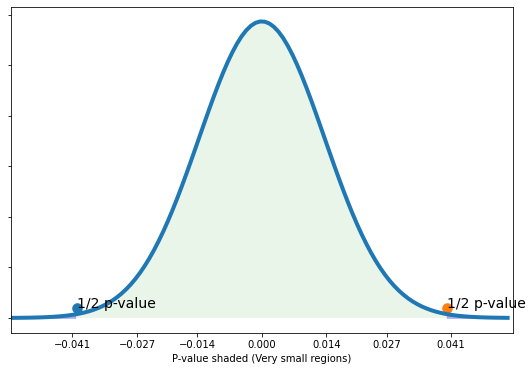

In [7]:
diff = p_1629 - p_30
SE = dist

x = np.arange(-4*SE, diff, 0.001)
x_all = np.arange(-4*SE, 4*SE, 0.001)
x_other = np.arange(abs(diff), 4*SE, 0.01)

y = sp.norm.pdf(x, 0, SE)
y2 = sp.norm.pdf(x_all, 0, SE)
y3 = sp.norm.pdf(x_other, 0, SE)

fig, ax = plt.subplots(figsize = (9, 6))
plt.style.use('fivethirtyeight')
ax.plot(x_all, y2)

plt.scatter(diff, 1, s=100)
plt.annotate("1/2 p-value", (diff, 1))
plt.scatter(abs(diff), 1, s=100)
plt.annotate("1/2 p-value", (abs(diff), 1))
ax.fill_between(x_other, y3, 0, alpha = 0.3, color = 'b')
ax.fill_between(x, y, 0,  alpha = 0.3, color = 'b')
ax.fill_between(x_all, y2, 0, alpha = 0.1)
ax.set_xlim([-4*SE, 4*SE])
ax.set_xlabel('P-value shaded (Very small regions)')
ax.set_xticks([np.round(i*SE, 3) for i in range(-3, 4)])
ax.set_yticklabels([])
plt.show()

**h)** Indicate the correct decision, the reason for it, and write an appropriate conclusion.

h.1) Give alpha.

Since we aren't in a life or death situation, I propose that an alpha of 0.05 should be enough for this problem

In [8]:
def rejectCheck(alpha, p):
    # Checks if a null hypothesis should be rejected. A return of 'True' indicates H_0 should be rejected.
    # A return of 'False' indicates H_0 should not be rejected.
    return alpha > p

In [9]:
alpha = 0.05

rejectCheck(alpha, p)

True

h.2) What is your decision?

We should reject our null hypothesis.

h.3) What is the reason for your decision?

We have that our alpha > p-value, which implies that we should reject our null hypothesis.

h.4) Give a conclusion.

We can conclude that at a significance level of 5%, we do have enough information to reject the claim that there is no difference in population proportions for those who use eReaders in the 16 - 29 age group and the 30+ age group. This would lead us to suppose our alternative hypothesis is likely true.

**i)** Explain how you determined which distribution to use.

We have been provided two samples and their associated sample proportions. These two samples are independent (a 16 - 29 year old having an eReader does not change the probability of a 30+ year old having an eReader), and we also have the following information:

$n_{1629} * p_{1629} = 44 \ge 10$

$n_{1629} * (1 - p_{1629}) = 584 \ge 10$

$n_{30+} * p_{30+} = 254 \ge 10$

$n_{30+} * (1 - p_{30+}) = 2055 \ge 10$

Given these facts, we know we can use a normal distribution to represent this problem.

=========================================================================================================================

**Problem 10.108:** Two computer users were discussing tablet computers. A higher proportion of people ages 16 to 29 use tablets than the proportion of people age 30 and older. Table 10.28 details the number of tablet owners for each age group. Test at the 1% level of significance. **Use Appendix E.**

| | 16-29 year olds | 30 years old and older |
|-|:---------------:|:----------------------:|
|**Own a Tablet:**| 69 | 231 |
|**Sample Size:** |628 |2309 |

In [10]:
xa = 69  # Number of 16 - 29 year olds who own a tablet
na = 628 # Sample size of 16 - 29 year olds
pa = xa/na # Sample proportion of 16 - 29 year olds who own a tablet

xb = 231 # Number of 30+ year olds who own a tablet
nb = 2309  # Sample size of 30+ year olds
pb = xb/nb # Sample proportion of 30+ year olds who own a tablet

pc = (xa + xb)/(na + nb)  # Pooled proportion
SE = (pc*(1 - pc)*((1/na) + (1/nb)))**(1/2)  # Standard Error

print(pa, pb)

0.10987261146496816 0.10004330879168472


**a)** State $H_0$.

We have two population proportions $P_{16-29}$ and $P_{30+}$. Our null hypothesis is a statement of no difference, thus we have:

$H_0: P_{16-29} = P_{30+}$

**b)** State $H_a$. 

$H_a: P_{16-29} \ne P_{30+}$

**c)** State what your random variable represents.

Our random variable $P_{16-29} - P_{30+}$ represents the difference in the population proportions of two different age groups owning a tablet.

**d)** State the distribution to use for the test.

We can use a normal distribution to represent this situation:

In [11]:
print(f"Our distribution is N(0, {SE})")

Our distribution is N(0, 0.013629249147632196)


**e)** What is the test statistic?

Once again we are seeking to compute our z-score here:

In [12]:
z = twoProp_zScore(pa, pb, xa, xb, na, nb)

print(f"Our z-score is {z}")

Our z-score is 0.721191796173972


**f)** What is the p-value? Explain what that p-value means for this problem.

I believe that since we have a positive z-score this time around we want to use the sp.norm.sf() method to compute our p-value:

In [13]:
p = sp.norm.sf(z)*2

print(f"Our p-value is {p}")

Our p-value is 0.47079151856424795


From this p-value we are able to determine that if our null hypothesis is true, there is about a 47.1% chance that we will be able to replicate the same (or more extreme) results with a different random sample. So if our null hypothesis does turn out to be true, there is about an 42.9% chance that the result is an outlier, given the 47.1% chance that our results can be replicated.

**g)** Use the previous information to create a graph.

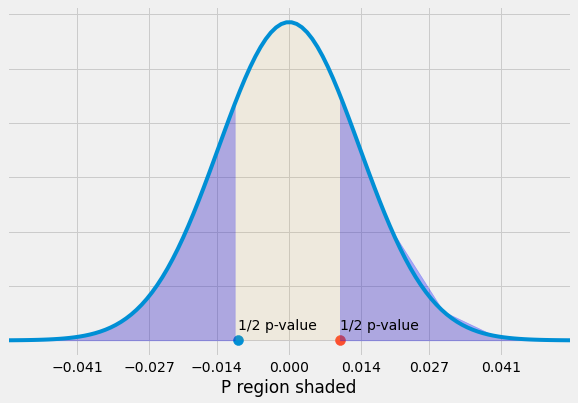

In [14]:
diff = pa - pb

x = np.arange(-4*SE, -diff, 0.001)
x_all = np.arange(-4*SE, 4*SE, 0.001)
x_other = np.arange(diff, 4*SE, 0.01)

y = sp.norm.pdf(x, 0, SE)
y2 = sp.norm.pdf(x_all, 0, SE)
y3 = sp.norm.pdf(x_other, 0, SE)

fig, ax = plt.subplots(figsize = (9, 6))
plt.style.use('fivethirtyeight')
ax.plot(x_all, y2)

plt.scatter(-diff, 0, s=100)
plt.annotate("1/2 p-value", (-diff, 1))
plt.scatter(abs(diff), 0, s=100)
plt.annotate("1/2 p-value", (abs(diff), 1))
ax.fill_between(x_other, y3, 0, alpha = 0.3, color = 'b')
ax.fill_between(x, y, 0,  alpha = 0.3, color = 'b')
ax.fill_between(x_all, y2, 0, alpha = 0.1)
ax.set_xlim([-4*SE, 4*SE])
ax.set_xlabel('P region shaded')
ax.set_xticks([np.round(i*SE, 3) for i in range(-3, 4)])
ax.set_yticklabels([])
plt.show()

**h)** Indicate the correct decision, the reason for it, and write an appropriate conclusion.

h.1) Give alpha.

This time around we have been specifically instructed to use an alpha of 0.01.

In [15]:
alpha = 0.01

rejectCheck(alpha, p)

False

h.2) What is your decision?

We should not reject our null hypothesis.

h.3) What is the reason for your decision?

We have that alpha $\leq$ p-value, so we cannot reject our null hypothesis.

h.4) Give a conclusion.

We can conclude that at a significance level of 1%, we do not have enough information to reject the claim that there is no difference in population proportions for those who own a tablet in the age ranges 16-29 and 30+. We cannot conclude that our null hypothesis is true, but we do know enough to say that it cannot be discounted.

**i)** Explain how you determined which distribution to use.

Once again we have two independent samples and sample proportions, and given that the following is true

$n_{1629} * p_{1629} = 69 \ge 10$

$n_{1629} * (1 - p_{1629}) = 559 \ge 10$

$n_{30+} * p_{30+} = 231 \ge 10$

$n_{30+} * (1 - p_{30+}) = 2078 \ge 10$

we know that we can use a normal distribution to represent this problem.

=========================================================================================================================

**Problem 11.86:** A recent debate about where in the United States skiers believe the skiing is best prompted the following survey. Test to see if the best ski area is independent of the level of the skier. **Use Appendix E.**

**Observed Frequency Table:**

|U.S. Ski Area|Beginner|Intermediate|Advanced|
|:------------|:------:|:----------:|:------:|
|**Tahoe:**       |20      |30          |40      |
|**Utah:**        |10      |30          |60      |
|**Colorado:**    |10      |40          |50      |


**a)** State $H_0$.

$H_0:$ The best ski area is independent of the level of the skier.

**b)** State $H_a$.

$H_a:$ The best ski area is not independent of the level of the skier.

**c)** What are the degrees of freedom?

When performing tests of independence, we calculate the degrees of freedom as 

$df =$(number of columns - 1)(number of rows - 1)

We have 3 columns and 3 rows, so that means that we have

$df =$ (2)(2) = 4 degrees of freedom.

**d)** State the distribution to use for the test.

We will be using a chi-square distribution with 4 degrees of freedom ${\chi_4}^2$

**e)** What is the test statistic?

When performing tests of independence we can compute the test statistic as

$\huge TestStat = {\Sigma_{(i * j)}{{{(O - E)}^2} \over E}}$

Where O is our observed values, E is our expected values, i is the number of rows, and j is the number of columns.

We have our O, i, and j values already from the chart, but we still need to compute our values for E. This can be done using the following equation:

$\huge E = {{(row total)(column total)} \over (total surveyed)}$


**Observed Frequency Table with Totals:**

|U.S. Ski Area|Beginner|Intermediate|Advanced|Total|
|:------------|:------:|:----------:|:------:|:---:|
|**Tahoe:**       |20      |30          |40      |90|
|**Utah:**        |10      |30          |60      |100|
|**Colorado:**    |10      |40          |50      |100|
|**Total:**       |40        |100            |150        |290|

In [16]:
# First I'm going to write a function to automate the calculation of E vals for me:

def indepTest_findEvals(col_tots, row_tots, overall):
    """
    Finds the E values to be used in independence testing.
    col_tots is a list of column totals
    row_tots is a list of row totals
    overall is a single integer sum
    """
    e_vals = [] # Empty list to hold resulting values of E
    for i in range(len(col_tots)):
        for j in range(len(row_tots)):
            val = (col_tots[i]*row_tots[j])/overall
            e_vals.append(val)
    return e_vals

In [17]:
row_totals = [40, 100, 150] # Row totals [Beginner, Intermediate, Advanced]

col_totals = [90, 100, 100] # Column totals [Tahoe, Utah, Colorado]

overall = 290 # Overall total

e_list = indepTest_findEvals(col_totals, row_totals, overall)

print(e_list)

[12.413793103448276, 31.03448275862069, 46.55172413793103, 13.793103448275861, 34.48275862068966, 51.724137931034484, 13.793103448275861, 34.48275862068966, 51.724137931034484]


Based on how I built my function, the first 3 values in the list are the beginner, intermediate, and advanced values for Tahoe, the second three are the beginner, intermediate, and advanced values for Utah, and the final three values are the beginner, intermediate, and advanced values for Colorado.

**Observed Frequency Table:**

|U.S. Ski Area|Beginner|Intermediate|Advanced|
|:------------|:------:|:----------:|:------:|
|**Tahoe:**       |20      |30          |40      |
|**Utah:**        |10      |30          |60      |
|**Colorado:**    |10      |40          |50      |


**Expected Frequency Table:**

|U.S. Ski Area|Beginner|Intermediate|Advanced|
|:------------|:------:|:----------:|:------:|
|**Tahoe:**       |12.413793103448276      |31.03448275862069          |46.55172413793103      |
|**Utah:**        |13.793103448275861      |34.48275862068966          |51.724137931034484      |
|**Colorado:**    |13.793103448275861      |34.48275862068966          |51.724137931034484      |


In [18]:
# Now lets write another function to compute the test statistic for us:

def indepTest_findTestStat(expected, observed, i, j):
    """
    Finds the test statistic to be used in an independence test
    expected is a list of the expected values
    observed is a list of the observed values
    i is the number of rows
    j is the number of columns
    """
    ret_list = []
    for i in range(i*j):
        val = ((expected[i] - observed[i])**2)/expected[i]
        ret_list.append(val)
        
    ret = sum(ret_list)
    return ret

In [19]:
o_list = [20, 30, 40, 10, 30, 60, 10, 40, 50]

test = indepTest_findTestStat(e_list, o_list, 3, 3)

print(f"Our test statistic is {test}")

Our test statistic is 10.525925925925922


**f)** What is the p-value? State what the p-value means for this problem.

So I did all that stuff above and *then* discovered that the function `sp.chisquare(f_obs, f_exp, ddof)` returns both the the Chi test statistic *and* the p-value when the observed value list is passed in for f_obs, the expected value list is passed in for f_exp, and the degrees of freedom are passed in for ddof. I'm still going to leave those functions I wrote up there because I'm pretty happy with them, but I will probably use the scipy methods for the rest of the assignment.

In [20]:
chi, p = sp.chisquare(o_list, f_exp = e_list, ddof = 4)
print(chi)
print(p)

10.525925925925922
0.03244173482963122


So our p-value is about 0.03244. What this means is that if our null hypothesis is true, there is about a 3.244% chance that we will be able to replicate the same (or more extreme) results with a different random sample. So if our null hypothesis does turn out to be true, there is about an 96.756% chance that the result is an outlier, given the 3.244% chance that our results can be replicated.

**g)** Create a graph.

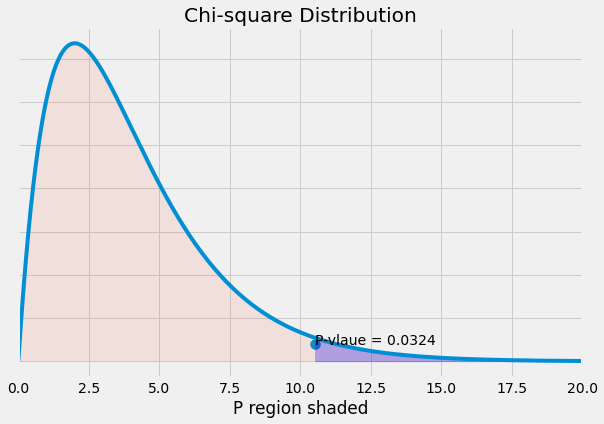

In [21]:
x_range = np.arange(chi, 20, .001) #this is what we're going to shade under
x_all = np.arange(0, 20, .001) # entire range of x,

y = sp.chi2.pdf(x_range,4)
y2 = sp.chi2.pdf(x_all,4)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

plt.scatter(chi, 0.01, s=100)
plt.annotate("P-vlaue = 0.0324", (chi, 0.01))
ax.fill_between(x_range,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([0,20])
ax.set_xlabel('P region shaded')

ax.set_yticklabels([])

ax.set_title("Chi-square Distribution")

plt.show()

**h)** Indicate the correct decision and write appropriate conclusions.

h.1) State alpha.

Since we have not been provided alpha and are not dealing with a life or death situation we will use the standard alpha of 0.05.

In [22]:
alpha = 0.05

rejectCheck(alpha, p)

True

h.2) What is your decision?

We should reject our null hypothesis.

h.3) What is the reason for your decision?

We have that alpha > p, which suggests we should reject our null hypothesis.

h.4) Give a conclusion.

We have enough evidence to reject the claim that the best ski are is independent of the level of skier, which leads us to assume our alternative hypothesis that the best ski area is not independent of the level of skier.

=========================================================================================================================

**Problem 11.90:** A manager of a sports club keeps information concerning the main sport in which members participate and their ages. To test whether there is a relationship between the age of a member and his or her choice of sport, 643 members of the sports club are randomly selected. Conduct a test of independence.

**Observed Frequency Table**

|Sport|18 - 25|26 - 30|31 - 40|41 and over|
|:----|:-----:|:-----:|:-----:|:---------:|
|**Raquetball**|42|58|30|46|
|**Tennis**|58|76|38|65|
|**Swimming**|72|60|65|33|

**a)** State $H_0$.

$H_0:$ The choice of sport is independent from the age of the member.

**b)** State $H_a$.

$H_a:$ The choice of sport is not independent from the age of the member.

**c)** What are the degrees of freedom?

$df =$(number of columns - 1)(number of rows - 1) = 2\*3 = 6

**d)** State the distribution to use for the test.

We will be using a chi-square distribution with 6 degrees of freedom ${\chi_6}^2$

**e)** What is the test statistic?

We now know we can compute both the p-value and the chi score by using `sp.chisquare(f_obs, f_exp, ddof)`.

However, before we can do this we need to find our list of expected values. We can do this using the function I wrote in the previous proble.

**Observed Frequency Table with Totals**

|Sport|18 - 25|26 - 30|31 - 40|41 and over|Total|
|:----|:-----:|:-----:|:-----:|:---------:|:---:|
|**Raquetball**|42|58|30|46|176|
|**Tennis**|58|76|38|65|237|
|**Swimming**|72|60|65|33|230|
|**Total**|172|194|133|144|643|

In [23]:
col_tots = [172, 194, 133, 144]
row_tots = [176, 237, 230]
overall = 643

e_list = indepTest_findEvals(col_tots, row_tots, overall)

print(e_list)

[47.07931570762053, 63.396578538102645, 61.524105754276825, 53.10108864696734, 71.5054432348367, 69.39346811819595, 36.40435458786936, 49.02177293934681, 47.573872472783826, 39.415241057542765, 53.07620528771384, 51.50855365474339]


In [24]:
# Now we just need to create a list of observed values structured the same way as the expected values list

o_list = [42, 58, 72, 58, 76, 60, 30, 38, 65, 46, 65, 33]

chi, p = sp.chisquare(o_list, e_list, ddof = 6)
print(f"Our chi test-statistic is {chi}")

Our chi test-statistic is 25.21448623925806


**f)** What is the p-value? State what the p-value means for this problem.

Okay, so things get a little weird here. First I should note that I check all of my answers using online calculators which have so far proven to be reliable. In the last problem, I computed my p-value using `sp.chisquare(f_obv, f_exp, ddof)`, and in that situation I recieved the correct value for p and for chi. However, this time around, when I used the `sp.chisquare(f_obv, f_exp, ddof)` I got the correct value for chi, but the function tells me that p is 0.00012666, which I know to be incorrect. I have no idea why the `sp.chisquare(f_obv, f_exp, ddof)` produced the correct chi value and worked perfectly in the last problem, but this time around isn't calculating p the right way. Instead, I am going to use `sp.chi2.sf(chi, df)` in order to compute what I know to be the correct p-value, but I am just so confused as to why `sp.chisquare(f_obv, f_exp, ddof)` is being inconsistent.

In [25]:
p = sp.chi2.sf(chi, 6)
print(f"Our p-value is {p}")

Our p-value is 0.00031159710161682476


So our p-value is about 0.000312. What this means is that if our null hypothesis is true, there is about a 0.0312% chance that we will be able to replicate the same (or more extreme) results with a different random sample. So if our null hypothesis does turn out to be true, there is about an 99.9688% chance that the result is an outlier, given the 0.0312% chance that our results can be replicated.

**g)** Create a graph.

So our p-region is so small in this case that it is difficult to actually see it in the graph, so I had to zoom in to the area where we could actually see the shaded region. As such, some of the graph is cut off, but it is all still there if you zoom out.

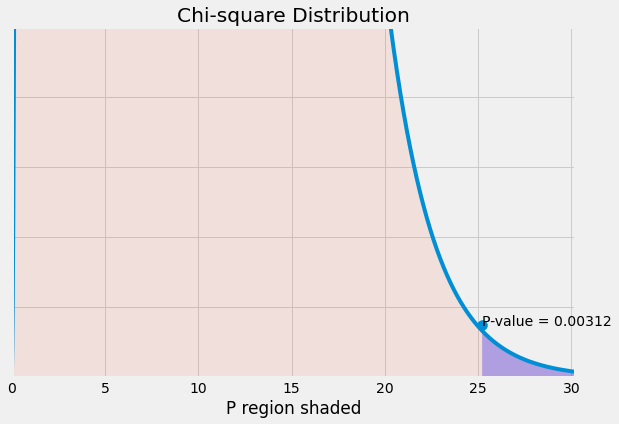

In [26]:
x_range = np.arange(chi, 50, .001) #this is what we're going to shade under
x_all = np.arange(0, 50, .001) # entire range of x,

y = sp.chi2.pdf(x_range,6)
y2 = sp.chi2.pdf(x_all,6)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

plt.scatter(chi, 0.00015, s=100)
plt.annotate("P-value = 0.00312", (chi, 0.00015))
ax.fill_between(x_range,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([0, chi+5])
ax.set_ylim([0, 0.001])
ax.set_xlabel('P region shaded')

ax.set_yticklabels([])

ax.set_title("Chi-square Distribution")

plt.show()

**h)** Indicate the correct decision and write appropriate conclusions.

h.1) State alpha.

We have not been provided an alpha and we are not dealing with a life or death scenario, so we can use the standard alpha of 0.05.

In [27]:
alpha = 0.05

rejectCheck(alpha, p)

True

h.2) What is your decision?

We should reject our null hypothesis

h.3) What is the reason for your decision?

We have that alpha > p-value, which suggests that we should reject our null hypothesis

h.4) Give a conclusion.

At the 5% significance level we have enough evidence to reject the claim that sport choice is independent from age. This leads us to assume that our alternative hypothesis is likely true, which is that sport choice is dependent on age.